In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv('D:/IPL Winning Prediction Capstone Project/IPL_Balls.csv')
data2=pd.read_csv('D:/IPL Winning Prediction Capstone Project/IPL_Matches.csv')

In [3]:
data1.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
data1['innings'].values

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [5]:
data1.shape

(225954, 17)

In [6]:
# teams1=['Rajasthan Royals', 'Royal Challengers Bangalore',
#        'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
#        'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
#        'Punjab Kings', 'Mumbai Indians']

In [7]:
# data1['BattingTeam']=data1['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

# data1['BattingTeam']=data1['BattingTeam'].str.replace('Kings XI Punjab','Punjab Kings')

# data1['BattingTeam']=data1['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


# data1=data1[data1['BattingTeam'].isin(teams1)]
# data1=data1[data1['BattingTeam'].isin(teams1)]

In [8]:
data1.shape

(225954, 17)

In [9]:
data1['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [10]:
data2.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [11]:
def runs(n):
    if(n['WonBy']=='Runs'):
        return n['Margin']
    elif(n['WonBy']=='Wickets'):
        return 0
    else:
        pass
data2['won_by_runs']=data2.apply(runs,axis=1)


In [12]:
def wickets(n):
    if(n['WonBy']=='Wickets'):
        return n['Margin']
    elif(n['WonBy']=='Runs'):
        return 0
    else:
        pass
data2['won_by_wickets']=data2.apply(wickets,axis=1)

In [13]:
data2['won_by']=np.where(data2['WonBy']=='Runs','BatFirst','BowlFirst')

In [14]:
data2.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,won_by_runs,won_by_wickets,won_by
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,14.0,0.0,BatFirst
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,0.0,7.0,BowlFirst
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,0.0,5.0,BowlFirst


In [15]:
data2.shape

(950, 23)

In [16]:
# plt.figure(figsize = (18,10))
# sns.countplot(x='Season',hue='win_by',data=data2,palette='hsv')
# plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
# plt.xlabel("Season",fontsize=15)
# plt.ylabel("Count",fontsize=15)
# plt.show()

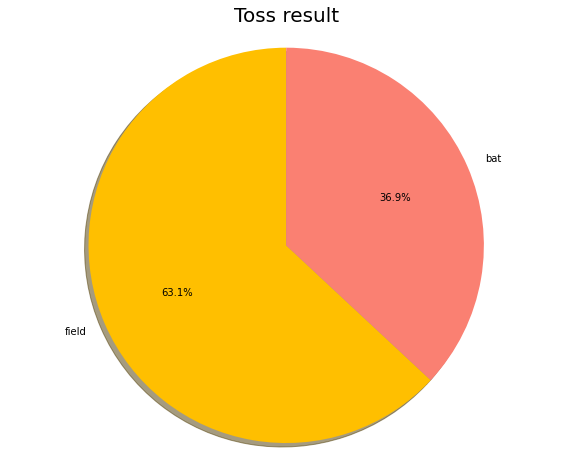

In [17]:
Toss=data2.TossDecision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

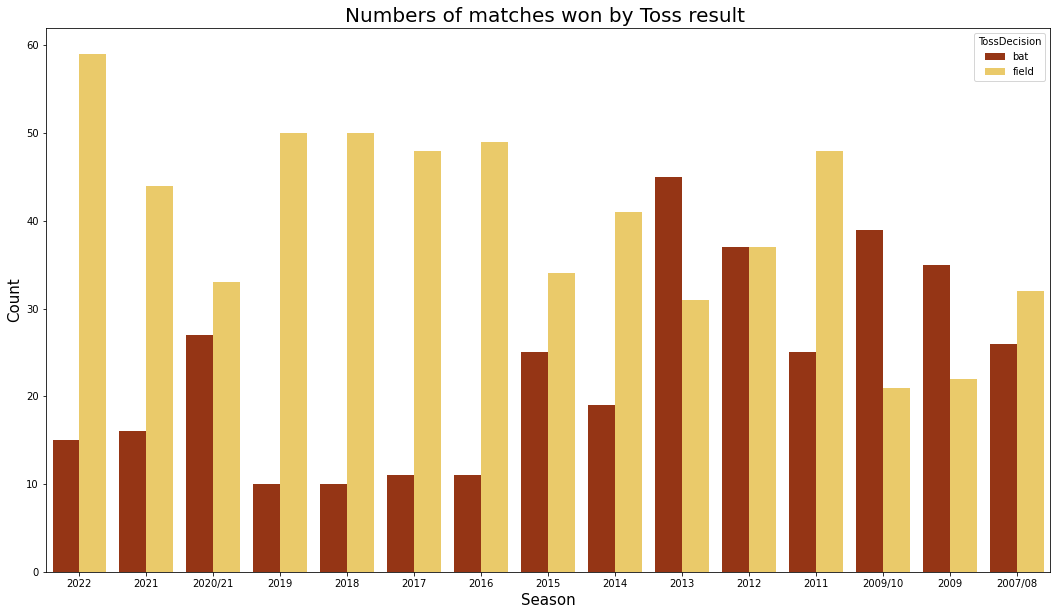

In [18]:
plt.figure(figsize = (18,10))
sns.countplot(x='Season',hue='TossDecision',data=data2,palette='afmhot')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [19]:
temp_team=data2[['ID','Team1','Team2']]
temp_team.head()

,ID,Team1,Team2
0,1312200,Rajasthan Royals,Gujarat Titans
1,1312199,Royal Challengers Bangalore,Rajasthan Royals
2,1312198,Royal Challengers Bangalore,Lucknow Super Giants
3,1312197,Rajasthan Royals,Gujarat Titans
4,1304116,Sunrisers Hyderabad,Punjab Kings


In [20]:
data1_temp=data1.merge(temp_team,on='ID')
data1_temp.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans


In [21]:
def bowling_team(n):
    if(n['BattingTeam']==n['Team1']):
        return n['Team2']
    elif(n['BattingTeam']==n['Team2']):
        return n['Team1']
    else:
        pass
data1_temp['BowlingTeam']=data1_temp.apply(bowling_team,axis=1)


In [22]:
data1_temp.tail()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
225953,335982,2,15,2,SB Joshi,LR Shukla,P Kumar,NaN,0,0,0,0,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders


In [23]:
data1_temp.shape

(225954, 20)

In [24]:
teams1=['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians']

In [25]:
data1_temp['BattingTeam']=data1_temp['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
data1_temp['BowlingTeam']=data1_temp['BowlingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

data1_temp['BattingTeam']=data1_temp['BattingTeam'].str.replace('Kings XI Punjab','Punjab Kings')
data1_temp['BowlingTeam']=data1_temp['BowlingTeam'].str.replace('Kings XI Punjab','Punjab Kings')

data1_temp['BattingTeam']=data1_temp['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data1_temp['BowlingTeam']=data1_temp['BowlingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

data1_temp['Team1']=data1_temp['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data1_temp['Team2']=data1_temp['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

data1_temp['Team1']=data1_temp['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
data1_temp['Team2']=data1_temp['Team2'].str.replace('Kings XI Punjab','Punjab Kings')

data1_temp['Team1']=data1_temp['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data1_temp['Team2']=data1_temp['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



data1_temp=data1_temp[data1_temp['BattingTeam'].isin(teams1)]
data1_temp=data1_temp[data1_temp['BowlingTeam'].isin(teams1)]
data1_temp=data1_temp[data1_temp['Team1'].isin(teams1)]
data1_temp=data1_temp[data1_temp['Team2'].isin(teams1)]

In [26]:
data1_temp['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders'],
      dtype=object)

In [27]:
data1_temp['BowlingTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Punjab Kings', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Delhi Capitals', 'Chennai Super Kings', 'Kolkata Knight Riders'],
      dtype=object)

In [28]:
data1_temp['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [29]:
data1_temp['Team2'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings'], dtype=object)

In [30]:
total_score=data1_temp.groupby(['ID','innings']).sum()['total_run'].reset_index()
total_score

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1692,1312198,2,193
1693,1312199,1,157
1694,1312199,2,161
1695,1312200,1,130


In [31]:
total_score1=total_score[total_score['innings']==1]
total_score1.head()

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [32]:
data2_total_score=data2.merge(total_score1[['ID','total_run']],left_on='ID',right_on='ID')
#data2_total_score=data2.merge(total_score1[['ID','total_run']],on='ID')
data2_total_score.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,won_by_runs,won_by_wickets,won_by,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,14.0,0.0,BatFirst,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,0.0,7.0,BowlFirst,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,0.0,5.0,BowlFirst,157


In [33]:
data2_total_score.shape

(835, 24)

In [34]:
teams=['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians']

In [35]:
data2_total_score['Team1']=data2_total_score['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data2_total_score['Team2']=data2_total_score['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

data2_total_score['Team1']=data2_total_score['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
data2_total_score['Team2']=data2_total_score['Team2'].str.replace('Kings XI Punjab','Punjab Kings')

data2_total_score['Team1']=data2_total_score['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data2_total_score['Team2']=data2_total_score['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

data2_total_score['TossWinner']=data2_total_score['TossWinner'].str.replace('Delhi Daredevils','Delhi Capitals')
data2_total_score['WinningTeam']=data2_total_score['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

data2_total_score['TossWinner']=data2_total_score['TossWinner'].str.replace('Kings XI Punjab','Punjab Kings')
data2_total_score['WinningTeam']=data2_total_score['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')

data2_total_score['TossWinner']=data2_total_score['TossWinner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data2_total_score['WinningTeam']=data2_total_score['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



In [36]:
data2_total_score=data2_total_score[data2_total_score['Team1'].isin(teams)]
data2_total_score=data2_total_score[data2_total_score['Team2'].isin(teams)]
data2_total_score=data2_total_score[data2_total_score['TossWinner'].isin(teams)]
data2_total_score=data2_total_score[data2_total_score['WinningTeam'].isin(teams)]

In [37]:
data2_total_score.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'won_by_runs', 'won_by_wickets',
       'won_by', 'total_run'],
      dtype='object')

In [38]:
data2_total_score.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,won_by_runs,won_by_wickets,won_by,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,14.0,0.0,BatFirst,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,0.0,7.0,BowlFirst,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,0.0,5.0,BowlFirst,157


In [39]:
data2_total_score['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings'], dtype=object)

In [40]:
data2_total_score['TossWinner'].unique()

array(['Rajasthan Royals', 'Lucknow Super Giants', 'Gujarat Titans',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Chennai Super Kings',
       'Punjab Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Capitals'], dtype=object)

In [41]:
data2_total_score['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [42]:
data2_total_score.shape

(832, 24)

In [43]:
season_data=data2_total_score[['ID','Season','WinningTeam']]

complete_data=data1_temp.merge(season_data,how='inner',left_on='ID',right_on='ID')

In [44]:
complete_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,Season,WinningTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2022,Gujarat Titans
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2022,Gujarat Titans
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2022,Gujarat Titans
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2022,Gujarat Titans
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2022,Gujarat Titans


In [45]:
wins_per_season = data2_total_score.groupby("Season")["WinningTeam"].value_counts()
pd.DataFrame(wins_per_season).head(8)

WinningTeam
Season  WinningTeam                             
2007/08 Rajasthan Royals                      13
        Punjab Kings                          10
        Chennai Super Kings                    9
        Delhi Capitals                         7
        Mumbai Indians                         7
        Kolkata Knight Riders                  6
        Royal Challengers Bangalore            4
        Sunrisers Hyderabad                    2

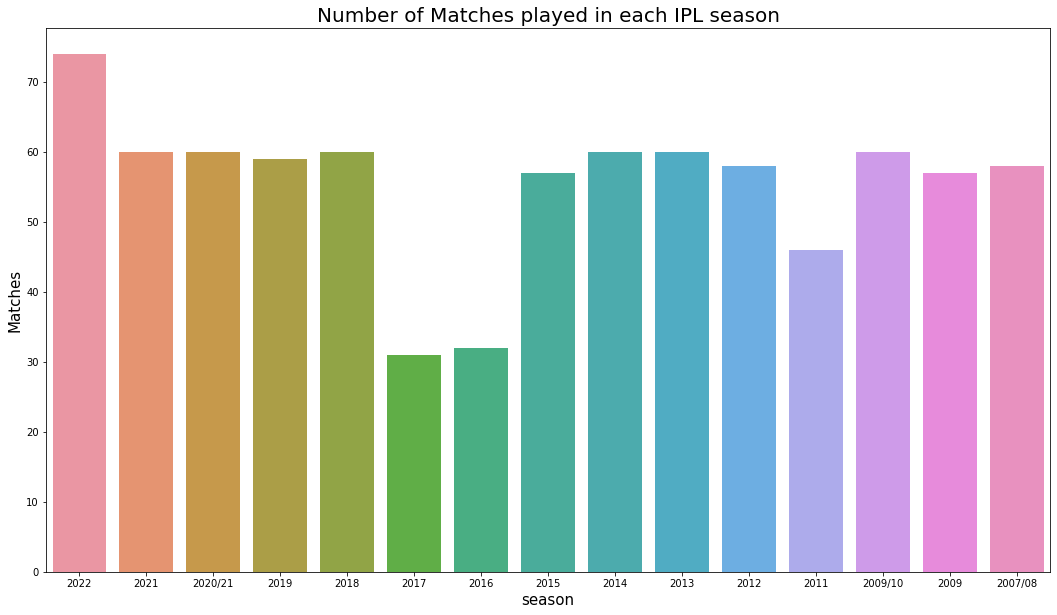

In [46]:
plt.figure(figsize = (18,10))
sns.countplot(x='Season',data=data2_total_score)
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

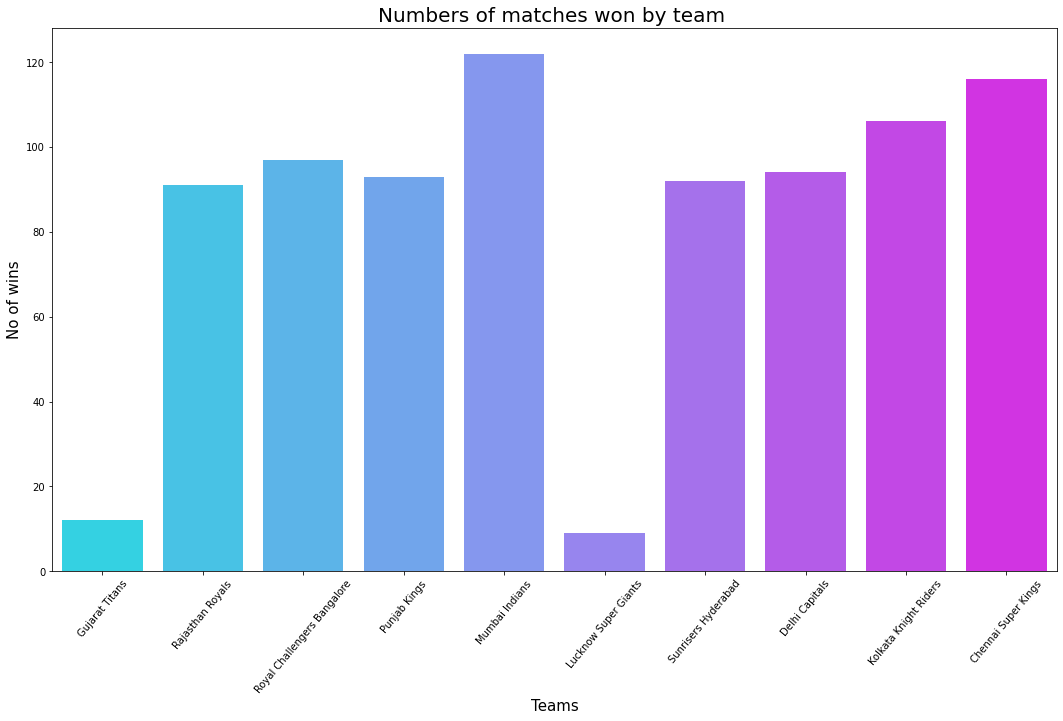

In [47]:
plt.figure(figsize = (18,10))
sns.countplot(x='WinningTeam',data=data2_total_score, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

In [48]:
Win=data2_total_score.won_by.value_counts()
Win

BowlFirst    456
BatFirst     376
Name: won_by, dtype: int64

In [49]:
labels=np.array(Win.index)
labels

array(['BowlFirst', 'BatFirst'], dtype=object)

In [50]:
sizes = Win.values
sizes

array([456, 376], dtype=int64)

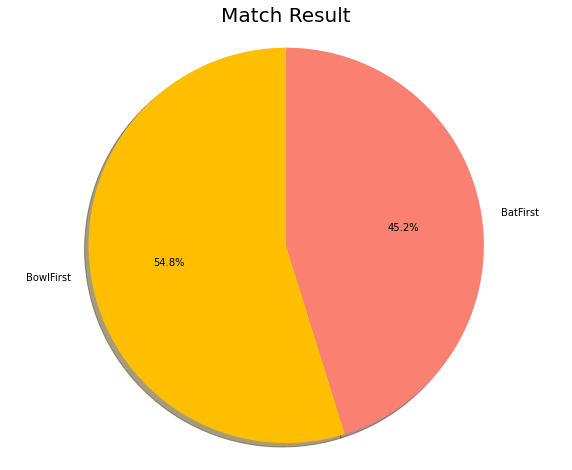

In [51]:
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

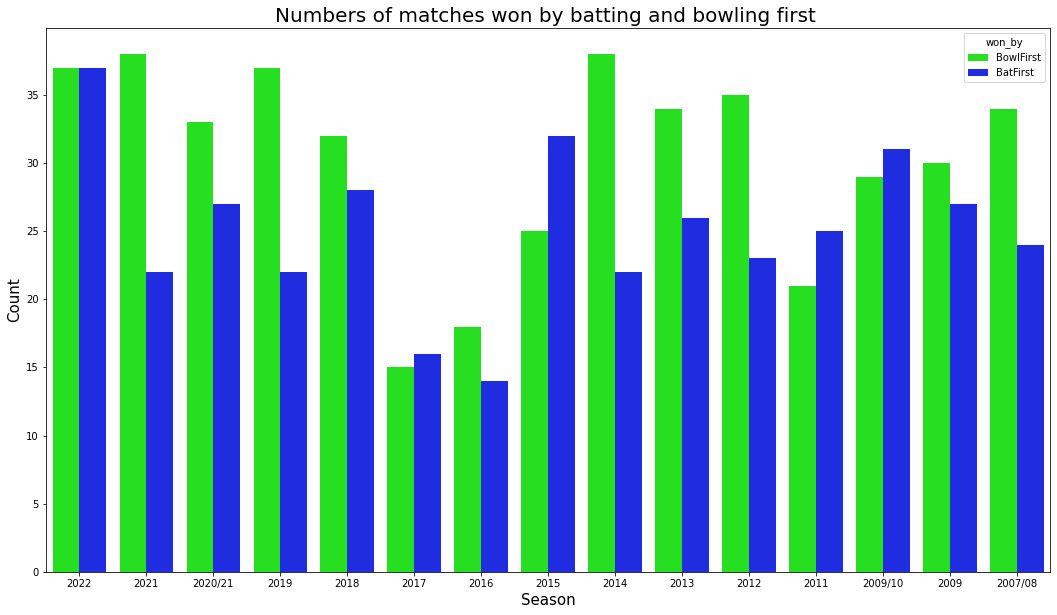

In [52]:
plt.figure(figsize = (18,10))
sns.countplot(x='Season',hue='won_by',data=data2_total_score,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

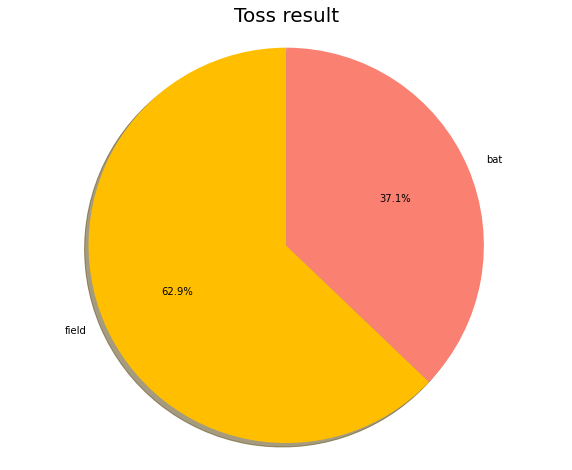

In [53]:
Toss=data2_total_score.TossDecision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

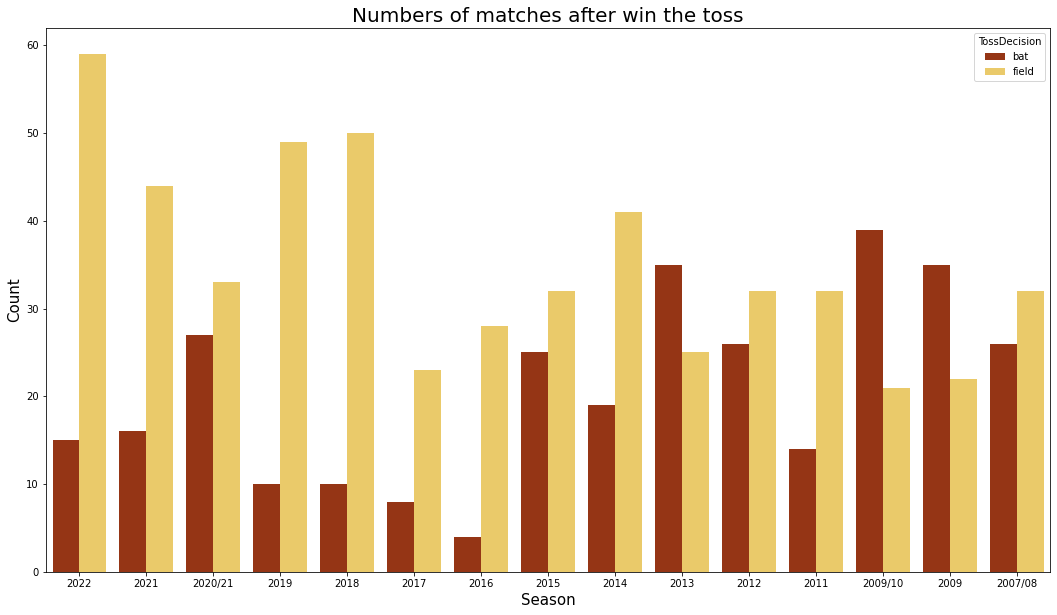

In [54]:
plt.figure(figsize = (18,10))
sns.countplot(x='Season',hue='TossDecision',data=data2_total_score,palette='afmhot')
plt.title("Numbers of matches after win the toss",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [55]:
data2_total_score.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,won_by_runs,won_by_wickets,won_by,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,14.0,0.0,BatFirst,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,0.0,7.0,BowlFirst,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,0.0,5.0,BowlFirst,157


In [56]:
final_matches=data2_total_score.drop_duplicates(subset=['Season'], keep='first')

In [57]:
final_matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,won_by_runs,won_by_wickets,won_by,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst,130
74,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,...,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth,27.0,0.0,BatFirst,192
134,1237181,NaN,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,...,NaN,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon,0.0,5.0,BowlFirst,156
194,1181768,Hyderabad,2019-05-12,2019,Final,Mumbai Indians,Chennai Super Kings,Rajiv Gandhi International Stadium,Mumbai Indians,bat,...,NaN,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['F du Plessis', 'SR Watson', 'SK Raina', 'AT ...",IJ Gould,Nitin Menon,1.0,0.0,BatFirst,149
254,1136620,Mumbai,2018-05-27,2018,Final,Sunrisers Hyderabad,Chennai Super Kings,Wankhede Stadium,Chennai Super Kings,field,...,NaN,SR Watson,"['SP Goswami', 'S Dhawan', 'KS Williamson', 'S...","['SR Watson', 'F du Plessis', 'SK Raina', 'AT ...",M Erasmus,S Ravi,0.0,8.0,BowlFirst,178


In [58]:
final_matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'won_by_runs', 'won_by_wickets',
       'won_by', 'total_run'],
      dtype='object')

In [59]:
final_matches[['Season','WinningTeam']].reset_index(drop=True).sort_values('Season')

,Season,WinningTeam
14,2007/08,Rajasthan Royals
13,2009,Sunrisers Hyderabad
12,2009/10,Chennai Super Kings
11,2011,Chennai Super Kings
10,2012,Kolkata Knight Riders
9,2013,Mumbai Indians
8,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
6,2016,Sunrisers Hyderabad
5,2017,Mumbai Indians


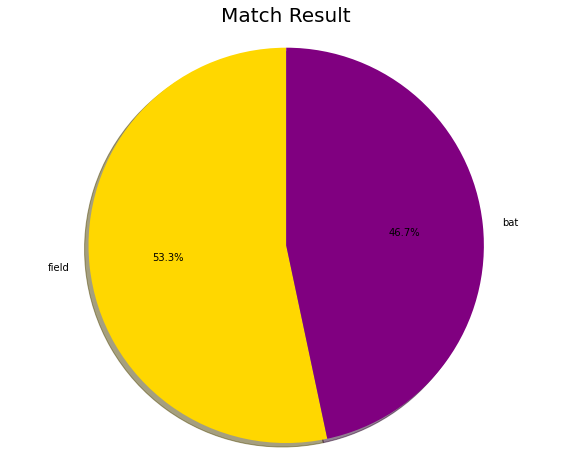

In [60]:
match = final_matches.won_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['gold', 'purple']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

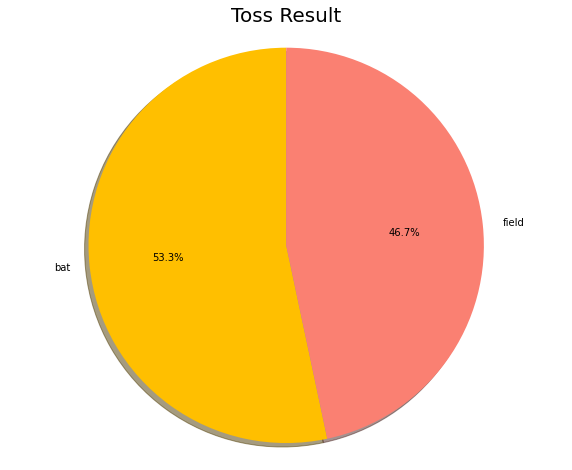

In [61]:
Toss=final_matches.TossDecision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal')
plt.show()

In [62]:
top_players = data2_total_score.Player_of_Match.value_counts()[:10]
top_players

AB de Villiers    20
CH Gayle          17
DA Warner         16
RG Sharma         16
SR Watson         15
MS Dhoni          14
KA Pollard        14
YK Pathan         14
SK Raina          12
AD Russell        12
Name: Player_of_Match, dtype: int64

<Figure size 1296x720 with 0 Axes>

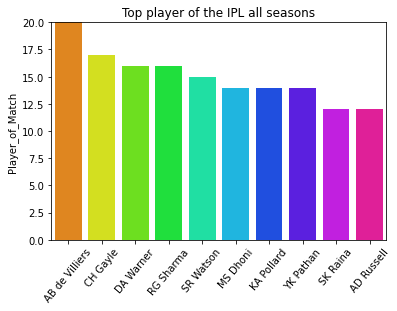

In [63]:
plt.figure(figsize = (18,10))
fig, ax = plt.subplots()
ax.set_ylim([0,20])
#ax.set_ylabel("Count")
ax.set_title("Top player of the IPL all seasons")
#top_players.plot.bar()
plt.xticks(rotation=50)
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

In [64]:
final_matches.groupby(['City','WinningTeam']).size()

City          WinningTeam          
Ahmedabad     Gujarat Titans           1
Bangalore     Kolkata Knight Riders    1
              Mumbai Indians           1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Dubai         Chennai Super Kings      1
Hyderabad     Mumbai Indians           1
Johannesburg  Sunrisers Hyderabad      1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [65]:
final_matches["WinningTeam"].value_counts()

Mumbai Indians           5
Chennai Super Kings      4
Sunrisers Hyderabad      2
Kolkata Knight Riders    2
Gujarat Titans           1
Rajasthan Royals         1
Name: WinningTeam, dtype: int64

In [66]:
final_matches[['TossWinner','TossDecision','WinningTeam']].reset_index(drop=True)

,TossWinner,TossDecision,WinningTeam
0,Rajasthan Royals,bat,Gujarat Titans
1,Kolkata Knight Riders,field,Chennai Super Kings
2,Delhi Capitals,bat,Mumbai Indians
3,Mumbai Indians,bat,Mumbai Indians
4,Chennai Super Kings,field,Chennai Super Kings
5,Mumbai Indians,field,Mumbai Indians
6,Sunrisers Hyderabad,bat,Sunrisers Hyderabad
7,Chennai Super Kings,field,Mumbai Indians
8,Kolkata Knight Riders,field,Kolkata Knight Riders
9,Mumbai Indians,bat,Mumbai Indians


In [67]:
final_matches[['Season','WinningTeam','Player_of_Match']].reset_index(drop=True)

,Season,WinningTeam,Player_of_Match
0,2022,Gujarat Titans,HH Pandya
1,2021,Chennai Super Kings,F du Plessis
2,2020/21,Mumbai Indians,TA Boult
3,2019,Mumbai Indians,JJ Bumrah
4,2018,Chennai Super Kings,SR Watson
5,2017,Mumbai Indians,KV Sharma
6,2016,Sunrisers Hyderabad,BCJ Cutting
7,2015,Mumbai Indians,RG Sharma
8,2014,Kolkata Knight Riders,MK Pandey
9,2013,Mumbai Indians,KA Pollard


In [68]:
len(final_matches[final_matches['TossWinner']==final_matches['WinningTeam']])

9

In [69]:
complete_data.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'Team1', 'Team2', 'BowlingTeam',
       'Season', 'WinningTeam'],
      dtype='object')

In [70]:
four_data=complete_data[complete_data['batsman_run']==4]
four_data.groupby('BattingTeam')['batsman_run'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
BattingTeam,,
Chennai Super Kings,10780,2695
Delhi Capitals,11356,2839
Gujarat Titans,1000,250
Kolkata Knight Riders,11292,2823
Lucknow Super Giants,752,188
Mumbai Indians,11784,2946
Punjab Kings,11144,2786
Rajasthan Royals,10156,2539
Royal Challengers Bangalore,10808,2702


In [71]:
six_data=complete_data[complete_data['batsman_run']==6]
six_data.groupby('BattingTeam')['batsman_run'].agg([('runs by six','sum'),('six','count')])

,runs by six,six
BattingTeam,,
Chennai Super Kings,7404,1234
Delhi Capitals,6210,1035
Gujarat Titans,474,79
Kolkata Knight Riders,6984,1164
Lucknow Super Giants,690,115
Mumbai Indians,7938,1323
Punjab Kings,7266,1211
Rajasthan Royals,5892,982
Royal Challengers Bangalore,7386,1231


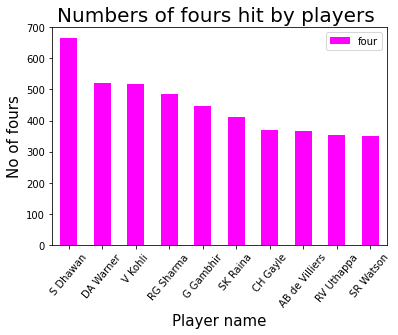

In [72]:
batsman_four=four_data.groupby('batter')['batsman_run'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batter','four',kind='bar',color='magenta')
plt.title("Numbers of fours hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

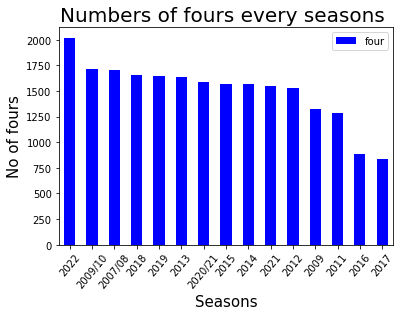

In [73]:
seasons_four=four_data.groupby('Season')['batsman_run'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=seasons_four.plot('Season','four',kind='bar',color='blue')
plt.title("Numbers of fours every seasons ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Seasons",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

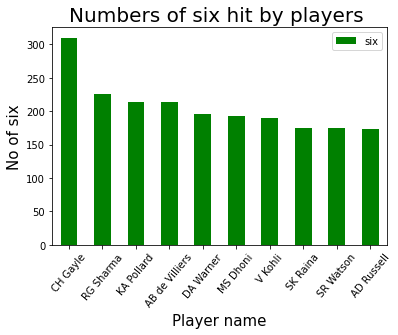

In [74]:
batsman_six=six_data.groupby('batter')['batsman_run'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batter','six',kind='bar',color='green')
plt.title("Numbers of six hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

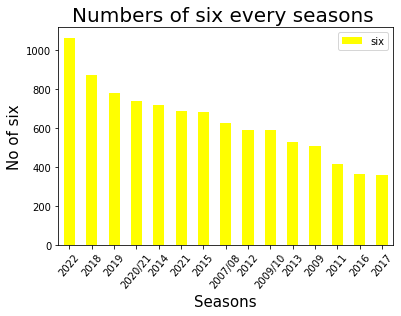

In [75]:
seasons_six=six_data.groupby('Season')['batsman_run'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=seasons_six.plot('Season','six',kind='bar',color='yellow')
plt.title("Numbers of six every seasons ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Seasons",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

In [76]:
batsman_score=data1_temp.groupby('batter')['batsman_run'].agg([('batsman_runs','sum')]).reset_index().sort_values('batsman_runs',ascending=False).reset_index(drop=True)
#batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batter,batsman_runs
0,V Kohli,5902
1,S Dhawan,5894
2,RG Sharma,5486
3,DA Warner,5319
4,AB de Villiers,4629
5,SK Raina,4499
6,CH Gayle,4470
7,MS Dhoni,4246
8,AT Rayudu,3959
9,G Gambhir,3813


In [77]:
data1_temp.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'Team1', 'Team2', 'BowlingTeam'],
      dtype='object')

In [78]:
data2.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'won_by_runs', 'won_by_wickets',
       'won_by'],
      dtype='object')

In [79]:
No_Matches_player= data1_temp[["ID","player_out"]]
No_Matches_player =No_Matches_player .groupby("player_out")["ID"].count().reset_index().sort_values(by="ID",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,RG Sharma,182
1,V Kohli,170
2,S Dhawan,168
3,SK Raina,140
4,KD Karthik,134


In [80]:
data1_temp['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

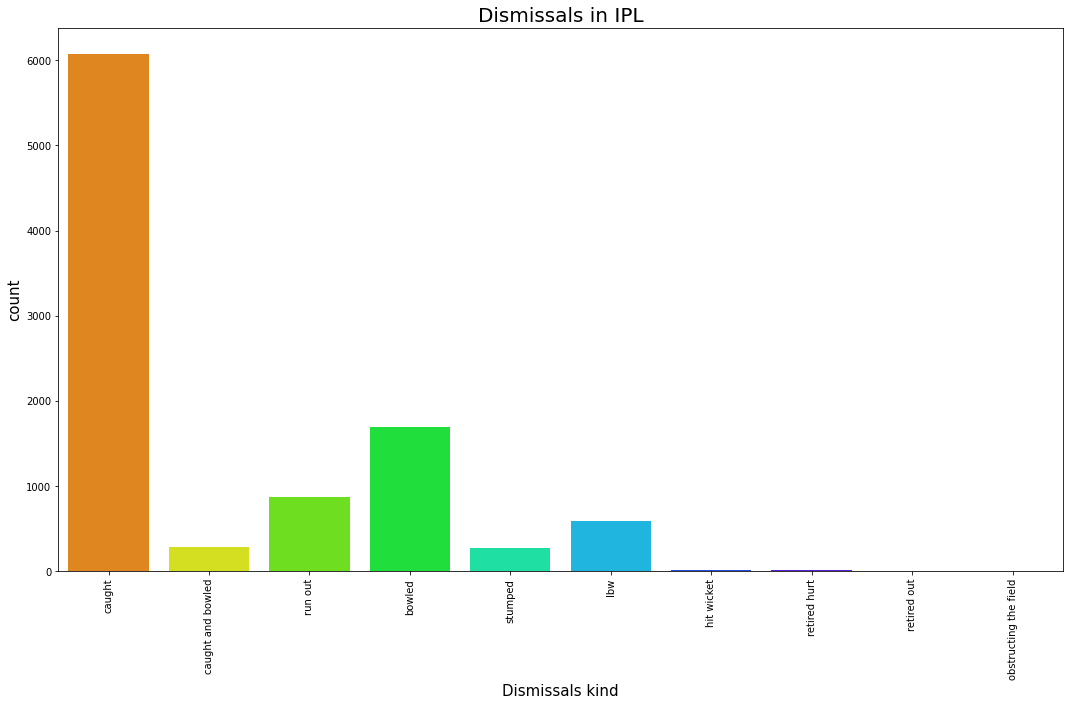

In [81]:
plt.figure(figsize=(18,10))
sns.countplot(x='kind',data=data1_temp,palette='hsv')
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [82]:
wicket_data=data1_temp.dropna(subset=['kind'])
wicket_data=wicket_data[wicket_data['kind'].isin(['caught', 'caught and bowled','bowled', 'stumped',
       'lbw', 'hit wicket'])]

In [83]:
wicket_data.groupby('bowler')['kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,DJ Bravo,160
1,YS Chahal,157
2,SL Malinga,152
3,A Mishra,149
4,PP Chawla,149
5,SP Narine,144
6,R Ashwin,140
7,Harbhajan Singh,138
8,JJ Bumrah,136
9,UT Yadav,128


In [84]:
data2_total_score['method'].value_counts()

D/L    15
Name: method, dtype: int64

In [85]:
data_teams1=data2_total_score.drop(data2_total_score.index[(data2_total_score['method']=='D/L')],axis=0,inplace=False)

In [86]:
data_teams1['method'].fillna(0,inplace=True)

In [87]:
data_teams1.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,won_by_runs,won_by_wickets,won_by,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,0.0,7.0,BowlFirst,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,14.0,0.0,BatFirst,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,0.0,7.0,BowlFirst,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,0.0,5.0,BowlFirst,157


In [88]:
data_teams1.shape

(817, 24)

In [89]:
data_teams1['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [90]:
data_teams2=data_teams1[['ID','City','WinningTeam','total_run']]

In [91]:
data_teams21=data_teams1[['ID','City','WinningTeam']]

In [92]:
data_teams2.shape

(817, 4)

In [93]:
data_teams21.shape

(817, 3)

In [94]:
data3=data_teams2.merge(data1_temp,on='ID')
data3.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam
0,1312200,Ahmedabad,Gujarat Titans,130,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,1312200,Ahmedabad,Gujarat Titans,130,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
2,1312200,Ahmedabad,Gujarat Titans,130,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
3,1312200,Ahmedabad,Gujarat Titans,130,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
4,1312200,Ahmedabad,Gujarat Titans,130,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans


In [95]:
data31=data_teams21.merge(data1_temp,on='ID')
data31.head()

,ID,City,WinningTeam,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam
0,1312200,Ahmedabad,Gujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,1312200,Ahmedabad,Gujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
2,1312200,Ahmedabad,Gujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
3,1312200,Ahmedabad,Gujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
4,1312200,Ahmedabad,Gujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans


In [96]:
data3.shape

(196145, 23)

In [97]:
data3['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders'],
      dtype=object)

In [98]:
data3['BowlingTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Punjab Kings', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Delhi Capitals', 'Chennai Super Kings', 'Kolkata Knight Riders'],
      dtype=object)

In [99]:
data4=data3[data3['innings']==2]

In [100]:
data41=data31[data31['innings']==1]

In [101]:
data4.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals


In [102]:
data41.head()

,ID,City,WinningTeam,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam
0,1312200,Ahmedabad,Gujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,1312200,Ahmedabad,Gujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
2,1312200,Ahmedabad,Gujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
3,1312200,Ahmedabad,Gujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans
4,1312200,Ahmedabad,Gujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans


In [103]:
data4.shape

(95056, 23)

In [104]:
data4['curr_runs']=data4.groupby(['ID']).cumsum()['total_run_y']

In [105]:
data41['curr_runs']=data41.groupby(['ID']).cumsum()['total_run']

In [106]:
data4.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,curr_runs
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,0
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,0
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,1
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,1
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,1


In [107]:
data41.head()

,ID,City,WinningTeam,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,curr_runs
0,1312200,Ahmedabad,Gujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0
1,1312200,Ahmedabad,Gujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,1
2,1312200,Ahmedabad,Gujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2
3,1312200,Ahmedabad,Gujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2
4,1312200,Ahmedabad,Gujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2


In [108]:
data4['r_l']=(data4['total_run_x']+1) - data4['curr_runs']

In [109]:
data4['b_l']=120-(data4['overs']*6+data4['ballnumber'])

In [110]:
data41['b_l']=120-(data41['overs']*6+data41['ballnumber'])

In [111]:
data4.tail()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,curr_runs,r_l,b_l
196140,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,NaN,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,80,143,31
196141,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,NaN,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,81,142,30
196142,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,NaN,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,81,142,29
196143,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,NaN,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,82,141,29
196144,335982,Bangalore,Kolkata Knight Riders,222,2,15,2,SB Joshi,LR Shukla,P Kumar,...,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,82,141,28


In [112]:
data41.tail()

,ID,City,WinningTeam,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,curr_runs,b_l
196039,335982,Bangalore,Kolkata Knight Riders,1,19,2,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,212,4
196040,335982,Bangalore,Kolkata Knight Riders,1,19,3,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,214,3
196041,335982,Bangalore,Kolkata Knight Riders,1,19,4,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,214,2
196042,335982,Bangalore,Kolkata Knight Riders,1,19,5,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,216,1
196043,335982,Bangalore,Kolkata Knight Riders,1,19,6,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,222,0


In [113]:
data4['player_out']=data4['player_out'].fillna(0)
data4['player_out']=data4['player_out'].apply(lambda x:x if x==0 else 1)
wicket=data4.groupby('ID').cumsum()['player_out'].values
data4['wicket_l']=10-wicket
data4.tail()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,curr_runs,r_l,b_l,wicket_l
196140,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,80,143,31,1
196141,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,81,142,30,1
196142,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,81,142,29,1
196143,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,82,141,29,1
196144,335982,Bangalore,Kolkata Knight Riders,222,2,15,2,SB Joshi,LR Shukla,P Kumar,...,caught,BB McCullum,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,82,141,28,0


In [114]:
data41['player_out']=data41['player_out'].fillna(0)
data41['player_out']=data41['player_out'].apply(lambda x:x if x==0 else 1)
wicket=data41.groupby('ID').cumsum()['player_out'].values
data41['wicket_l']=10-wicket
data41.tail()

,ID,City,WinningTeam,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,...,player_out,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,curr_runs,b_l,wicket_l
196039,335982,Bangalore,Kolkata Knight Riders,1,19,2,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,212,4,7
196040,335982,Bangalore,Kolkata Knight Riders,1,19,3,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,214,3,7
196041,335982,Bangalore,Kolkata Knight Riders,1,19,4,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,214,2,7
196042,335982,Bangalore,Kolkata Knight Riders,1,19,5,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,216,1,7
196043,335982,Bangalore,Kolkata Knight Riders,1,19,6,BB McCullum,P Kumar,Mohammad Hafeez,NaN,...,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,222,0,7


In [115]:
data4['c_r']=(data4['curr_runs']/(120-data4['b_l']))*6
data4.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,curr_runs,r_l,b_l,wicket_l,c_r
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,0,131,119,10,0.0
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,0,131,118,10,0.0
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,1,130,117,10,2.0
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,1,130,116,10,1.5
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,NaN,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,1,130,115,10,1.2


In [116]:
data41['c_r']=(data41['curr_runs']/(120-data41['b_l']))*6
data41.head()

,ID,City,WinningTeam,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,...,kind,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,curr_runs,b_l,wicket_l,c_r
0,1312200,Ahmedabad,Gujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,119,10,0.0
1,1312200,Ahmedabad,Gujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,...,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,1,118,10,3.0
2,1312200,Ahmedabad,Gujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,...,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2,117,10,4.0
3,1312200,Ahmedabad,Gujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2,116,10,3.0
4,1312200,Ahmedabad,Gujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,NaN,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2,115,10,2.4


In [117]:
data4['r_r']=(data4['r_l']/data4['b_l'])*6
data4.tail()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,BattingTeam,Team1,Team2,BowlingTeam,curr_runs,r_l,b_l,wicket_l,c_r,r_r
196140,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,80,143,31,1,5.393258,27.677419
196141,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,81,142,30,1,5.400000,28.400000
196142,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,81,142,29,1,5.340659,29.379310
196143,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,82,141,29,1,5.406593,29.172414
196144,335982,Bangalore,Kolkata Knight Riders,222,2,15,2,SB Joshi,LR Shukla,P Kumar,...,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,82,141,28,0,5.347826,30.214286


In [118]:
def result(r):
    if(r['WinningTeam']==r['BattingTeam']):
        return 1
    else:
        return 0
data4['result']=data4.apply(result,axis=1)    
    
    

In [119]:
data4.head(6)

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,Team1,Team2,BowlingTeam,curr_runs,r_l,b_l,wicket_l,c_r,r_r,result
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,0,131,119,10,0.0,6.605042,1
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,0,131,118,10,0.0,6.661017,1
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,1,130,117,10,2.0,6.666667,1
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,1,130,116,10,1.5,6.724138,1
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,1,130,115,10,1.2,6.782609,1
125,1312200,Ahmedabad,Gujarat Titans,130,2,0,6,Shubman Gill,TA Boult,WP Saha,...,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,5,126,114,10,5.0,6.631579,1


In [120]:
def result(r):
    if(r['WinningTeam']==r['BattingTeam']):
        return 1
    else:
        return 0
data41['result']=data41.apply(result,axis=1)  

In [121]:
data4.columns

Index(['ID', 'City', 'WinningTeam', 'total_run_x', 'innings', 'overs',
       'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run_y', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'Team1', 'Team2', 'BowlingTeam', 'curr_runs', 'r_l',
       'b_l', 'wicket_l', 'c_r', 'r_r', 'result'],
      dtype='object')

In [122]:
data41.head()

,ID,City,WinningTeam,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,...,fielders_involved,BattingTeam,Team1,Team2,BowlingTeam,curr_runs,b_l,wicket_l,c_r,result
0,1312200,Ahmedabad,Gujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,119,10,0.0,0
1,1312200,Ahmedabad,Gujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,...,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,1,118,10,3.0,0
2,1312200,Ahmedabad,Gujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,...,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2,117,10,4.0,0
3,1312200,Ahmedabad,Gujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2,116,10,3.0,0
4,1312200,Ahmedabad,Gujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,...,NaN,Rajasthan Royals,Rajasthan Royals,Gujarat Titans,Gujarat Titans,2,115,10,2.4,0


In [123]:
data5=data4[['BattingTeam','BowlingTeam','City','r_l','b_l','wicket_l','total_run_x','c_r','r_r','result']]

In [124]:
data51=data41[['BattingTeam','BowlingTeam','City','curr_runs','b_l','wicket_l','c_r','result']]

In [125]:
data5.head()

,BattingTeam,BowlingTeam,City,r_l,b_l,wicket_l,total_run_x,c_r,r_r,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,130,0.0,6.605042,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,130,0.0,6.661017,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,130,2.0,6.666667,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,130,1.5,6.724138,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,130,1.2,6.782609,1


In [126]:
data51.head()

,BattingTeam,BowlingTeam,City,curr_runs,b_l,wicket_l,c_r,result
0,Rajasthan Royals,Gujarat Titans,Ahmedabad,0,119,10,0.0,0
1,Rajasthan Royals,Gujarat Titans,Ahmedabad,1,118,10,3.0,0
2,Rajasthan Royals,Gujarat Titans,Ahmedabad,2,117,10,4.0,0
3,Rajasthan Royals,Gujarat Titans,Ahmedabad,2,116,10,3.0,0
4,Rajasthan Royals,Gujarat Titans,Ahmedabad,2,115,10,2.4,0


In [127]:
data5.shape

(95056, 10)

In [128]:
data5['BattingTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings'], dtype=object)

In [129]:
crosstabresult=pd.crosstab(index=data5['BattingTeam'],columns=data5['City'])

In [130]:
from scipy.stats import chi2_contingency
chiresult=chi2_contingency(crosstabresult)

In [131]:
print(chiresult[1])

0.0


In [132]:
data6=data5.sample(data5.shape[0])

In [133]:
data61=data51.sample(data51.shape[0])

In [134]:
data6.sample()

,BattingTeam,BowlingTeam,City,r_l,b_l,wicket_l,total_run_x,c_r,r_r,result
70209,Delhi Capitals,Punjab Kings,Delhi,113,101,9,143,9.789474,6.712871,0


In [135]:
data61.sample()

,BattingTeam,BowlingTeam,City,curr_runs,b_l,wicket_l,c_r,result
16700,Rajasthan Royals,Sunrisers Hyderabad,Pune,13,103,10,4.588235,1


In [136]:
data6.head()

,BattingTeam,BowlingTeam,City,r_l,b_l,wicket_l,total_run_x,c_r,r_r,result
185271,Chennai Super Kings,Rajasthan Royals,Chennai,128,67,8,211,9.509434,11.462687,0
7634,Gujarat Titans,Royal Challengers Bangalore,Mumbai,140,93,10,170,6.888889,9.032258,1
154147,Rajasthan Royals,Delhi Capitals,Jaipur,44,43,7,151,8.415584,6.139535,1
81887,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,132,69,8,207,8.941176,11.478261,0
143846,Sunrisers Hyderabad,Chennai Super Kings,Visakhapatnam,175,104,10,193,7.125000,10.096154,0


In [137]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95056 entries, 185271 to 143360
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BattingTeam  95056 non-null  object 
 1   BowlingTeam  95056 non-null  object 
 2   City         89044 non-null  object 
 3   r_l          95056 non-null  int64  
 4   b_l          95056 non-null  int64  
 5   wicket_l     95056 non-null  int64  
 6   total_run_x  95056 non-null  int64  
 7   c_r          95056 non-null  float64
 8   r_r          95045 non-null  float64
 9   result       95056 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 8.0+ MB


In [138]:
data6.isnull().sum()

BattingTeam       0
BowlingTeam       0
City           6012
r_l               0
b_l               0
wicket_l          0
total_run_x       0
c_r               0
r_r              11
result            0
dtype: int64

In [139]:
data6.shape

(95056, 10)

In [140]:
len(data6)

95056

In [141]:
data6.columns

Index(['BattingTeam', 'BowlingTeam', 'City', 'r_l', 'b_l', 'wicket_l',
       'total_run_x', 'c_r', 'r_r', 'result'],
      dtype='object')

In [142]:
data6['BattingTeam'].unique()

array(['Chennai Super Kings', 'Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Delhi Capitals', 'Punjab Kings', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Lucknow Super Giants'], dtype=object)

In [143]:
data6['City'].unique()

array(['Chennai', 'Mumbai', 'Jaipur', 'Hyderabad', 'Visakhapatnam',
       'Chandigarh', 'Kolkata', 'Pune', nan, 'Abu Dhabi', 'Dharamsala',
       'Delhi', 'Ranchi', 'Bangalore', 'Cuttack', 'Indore', 'Centurion',
       'Nagpur', 'Bengaluru', 'Sharjah', 'Dubai', 'Ahmedabad',
       'Navi Mumbai', 'Johannesburg', 'Cape Town', 'Durban', 'Raipur',
       'Port Elizabeth', 'East London', 'Kimberley', 'Bloemfontein'],
      dtype=object)

In [144]:
data61.head()

,BattingTeam,BowlingTeam,City,curr_runs,b_l,wicket_l,c_r,result
141337,Mumbai Indians,Delhi Capitals,Mumbai,5,101,8,1.578947,0
35507,Sunrisers Hyderabad,Delhi Capitals,NaN,177,28,8,11.543478,1
129229,Mumbai Indians,Delhi Capitals,Mumbai,65,69,8,7.647059,1
184627,Punjab Kings,Kolkata Knight Riders,Kolkata,24,101,9,7.578947,0
16766,Rajasthan Royals,Sunrisers Hyderabad,Pune,119,42,8,9.153846,1


In [145]:
data61.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100941 entries, 141337 to 41800
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BattingTeam  100941 non-null  object 
 1   BowlingTeam  100941 non-null  object 
 2   City         94598 non-null   object 
 3   curr_runs    100941 non-null  int64  
 4   b_l          100941 non-null  int64  
 5   wicket_l     100941 non-null  int64  
 6   c_r          100941 non-null  float64
 7   result       100941 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.9+ MB


In [146]:
data61.isnull().sum()

BattingTeam       0
BowlingTeam       0
City           6343
curr_runs         0
b_l               0
wicket_l          0
c_r               0
result            0
dtype: int64

In [147]:
data61.columns

Index(['BattingTeam', 'BowlingTeam', 'City', 'curr_runs', 'b_l', 'wicket_l',
       'c_r', 'result'],
      dtype='object')

In [148]:
data61.shape

(100941, 8)

In [149]:
len(data61)

100941

In [150]:
data61['BattingTeam'].unique()

array(['Mumbai Indians', 'Sunrisers Hyderabad', 'Punjab Kings',
       'Rajasthan Royals', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Gujarat Titans', 'Delhi Capitals',
       'Chennai Super Kings', 'Lucknow Super Giants'], dtype=object)

In [151]:
data61['City'].unique()

array(['Mumbai', nan, 'Kolkata', 'Pune', 'Durban', 'Abu Dhabi', 'Delhi',
       'Hyderabad', 'Bangalore', 'Cape Town', 'Bengaluru', 'Sharjah',
       'Chennai', 'Navi Mumbai', 'Johannesburg', 'Chandigarh', 'Jaipur',
       'Visakhapatnam', 'Kimberley', 'Ahmedabad', 'Port Elizabeth',
       'Centurion', 'Ranchi', 'East London', 'Dharamsala', 'Indore',
       'Raipur', 'Dubai', 'Cuttack', 'Bloemfontein', 'Nagpur'],
      dtype=object)

In [152]:
data6.dropna(inplace=True)

In [153]:
data61.dropna(inplace=True)

In [154]:
data6=data6[data6['b_l']!=0]

In [155]:
data61=data61[data61['b_l']!=0]

In [156]:
data6.describe()

,r_l,b_l,wicket_l,total_run_x,c_r,r_r,result
count,88743.000000,88743.000000,88743.000000,88743.000000,88743.000000,88743.000000,88743.000000
mean,92.982568,62.771317,7.551469,165.028284,7.420015,10.503936,0.527997
std,49.665376,33.275929,2.133935,28.742679,2.240277,13.970413,0.499218
min,-5.000000,-2.000000,0.000000,67.000000,0.000000,-516.000000,0.000000
25%,54.000000,35.000000,6.000000,147.000000,6.272727,7.235294,0.000000
50%,92.000000,63.000000,8.000000,165.000000,7.483871,8.921053,1.000000
75%,130.000000,92.000000,9.000000,184.000000,8.653846,10.971429,1.000000
max,247.000000,119.000000,10.000000,246.000000,36.000000,714.000000,1.000000


In [157]:
data61.describe()

,curr_runs,b_l,wicket_l,c_r,result
count,93880.000000,93880.000000,93880.000000,93880.000000,93880.000000
mean,75.867341,60.062473,7.610897,7.281428,0.457595
std,49.224051,34.436407,2.000419,2.173372,0.498201
min,0.000000,-4.000000,0.000000,0.000000,0.000000
25%,35.000000,30.000000,6.000000,6.107143,0.000000
50%,71.000000,60.000000,8.000000,7.371429,0.000000
75%,112.000000,90.000000,9.000000,8.500000,1.000000
max,246.000000,119.000000,10.000000,36.000000,1.000000


In [158]:
data6.corr()

,r_l,b_l,wicket_l,total_run_x,c_r,r_r,result
r_l,1.000000,0.841479,0.495923,0.394260,-0.224280,-0.026980,-0.259567
b_l,0.841479,1.000000,0.752955,-0.070141,-0.182927,-0.218233,0.049563
wicket_l,0.495923,0.752955,1.000000,-0.162420,0.035130,-0.330920,0.320937
total_run_x,0.394260,-0.070141,-0.162420,1.000000,0.259325,0.240841,-0.431374
c_r,-0.224280,-0.182927,0.035130,0.259325,1.000000,-0.017756,0.128430
r_r,-0.026980,-0.218233,-0.330920,0.240841,-0.017756,1.000000,-0.230780
result,-0.259567,0.049563,0.320937,-0.431374,0.128430,-0.230780,1.000000


In [159]:
data61.corr()

,curr_runs,b_l,wicket_l,c_r,result
curr_runs,1.000000,-0.939619,-0.604080,0.458746,0.113055
b_l,-0.939619,1.000000,0.760418,-0.250837,-0.004816
wicket_l,-0.604080,0.760418,1.000000,0.030817,0.140641
c_r,0.458746,-0.250837,0.030817,1.000000,0.215629
result,0.113055,-0.004816,0.140641,0.215629,1.000000


In [160]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns


In [161]:
categorical=identify_nominal_columns(data6)
categorical

['BattingTeam', 'BowlingTeam', 'City']

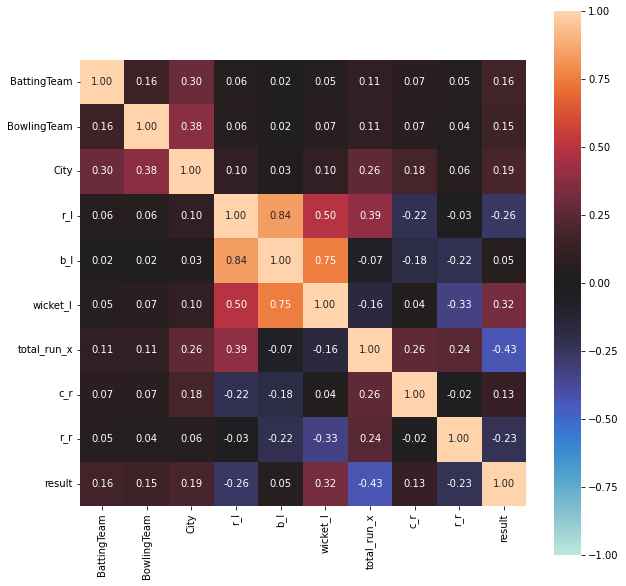

In [162]:
corr=associations(data6,filename='corr.png',figsize=(10,10))

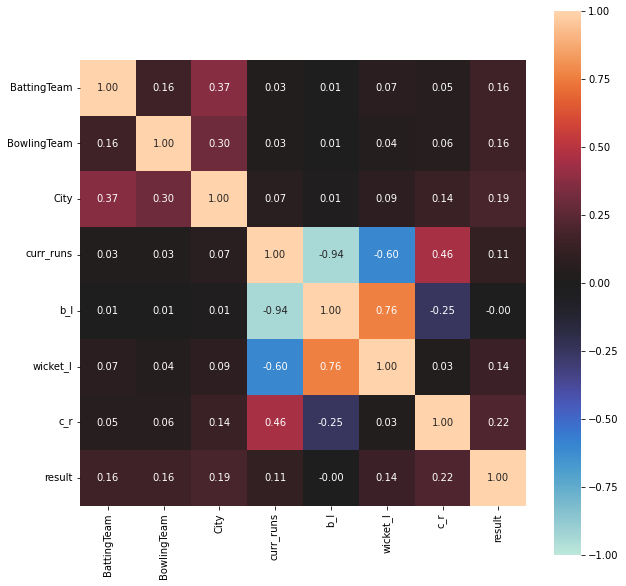

In [163]:
corr1=associations(data61,filename='corr1.png',figsize=(10,10))

In [164]:
x=data6.iloc[:,:-1]
y=data6.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [165]:
x1=data61.iloc[:,:-1]
y1=data61.iloc[:,-1]
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=1)

In [166]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

ct=ColumnTransformer([('f1',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
    
],remainder='passthrough')

ct1=ColumnTransformer([('f2',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
    
],remainder='passthrough')


In [167]:
pipe=Pipeline(steps=[
    ('ste1',ct),
    ('scaler',StandardScaler()),
    ('lr',LogisticRegression())
    
])

In [168]:
# from sklearn.svm import SVC
# pipe=Pipeline(steps=[
#     ('ste1',ct),
#     ('scaler',StandardScaler()),
#     ('svm',SVC())
    
#  ])

In [169]:
pipe1=Pipeline(steps=[
    ('ste2',ct1),
    ('scaler',StandardScaler()),
    ('lr',LogisticRegression())
    
])

In [170]:
from sklearn import set_config
set_config(display='diagram')

In [171]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('ste1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('f1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [172]:
pipe1.fit(x1_train,y1_train)

Pipeline(steps=[('ste2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('f2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [173]:
pipe.named_steps

{'ste1': ColumnTransformer(remainder='passthrough',
                   transformers=[('f1',
                                  OneHotEncoder(drop='first', sparse=False),
                                  ['BattingTeam', 'BowlingTeam', 'City'])]),
 'scaler': StandardScaler(),
 'lr': LogisticRegression()}

In [174]:
pipe1.named_steps

{'ste2': ColumnTransformer(remainder='passthrough',
                   transformers=[('f2',
                                  OneHotEncoder(drop='first', sparse=False),
                                  ['BattingTeam', 'BowlingTeam', 'City'])]),
 'scaler': StandardScaler(),
 'lr': LogisticRegression()}

In [175]:
print(str(pipe.score(x_train,y_train)))
print(str(pipe.score(x_test,y_test)))

0.8116601402935459
0.8119330666516423


In [176]:
print(str(pipe1.score(x1_train,y1_train)))
print(str(pipe1.score(x1_test,y1_test)))

0.6900963996591394
0.6812420110779719


In [177]:
y_p=pipe.predict(x_test)

In [178]:
y1_p=pipe1.predict(x1_test)

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_p)

0.8119330666516423

In [180]:
accuracy_score(y1_test,y1_p)

0.6812420110779719

In [181]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
confusion_matrix(y_test,y_p)

array([[6647, 1775],
       [1563, 7764]], dtype=int64)

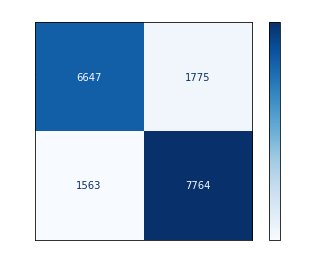

In [182]:
color='white'
matrix=plot_confusion_matrix(pipe,x_test,y_test,cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label',color=color)
plt.ylabel('True Label',color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [183]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      8422
           1       0.81      0.83      0.82      9327

    accuracy                           0.81     17749
   macro avg       0.81      0.81      0.81     17749
weighted avg       0.81      0.81      0.81     17749



In [184]:
confusion_matrix(y1_test,y1_p)

array([[7666, 2529],
       [3456, 5125]], dtype=int64)

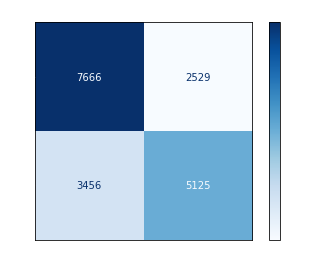

In [185]:
color='white'
matrix=plot_confusion_matrix(pipe1,x1_test,y1_test,cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label',color=color)
plt.ylabel('True Label',color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [186]:
print(classification_report(y1_test,y1_p))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10195
           1       0.67      0.60      0.63      8581

    accuracy                           0.68     18776
   macro avg       0.68      0.67      0.68     18776
weighted avg       0.68      0.68      0.68     18776



In [187]:
#cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train,y_train,cv=5,scoring='accuracy').mean()

0.8108854676609374

In [188]:
#cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe1,x1_train,y1_train,cv=5,scoring='accuracy').mean()

0.6893107776055377

In [189]:
parameters={'scaler':[StandardScaler(),MinMaxScaler(),Normalizer(),MaxAbsScaler()],
            'lr__penalty':['l2','l1','elasticnet',None],
            'lr__C':[100,10,1.0,0.1,0.01],
            'lr__solver':['newton-cg','lbfgs','liblinear']
            
           }
grid=GridSearchCV(pipe,parameters,cv=2,scoring='accuracy')
#'lr_c_values':[100,10,1.0,0.1,0.01],
#'lr_penalty':['l2','l1','elasticnet',None],
#'lr_solvers':['newton-cg','lbfgs','liblinear']

In [190]:
parameters1={'scaler':[StandardScaler(),MinMaxScaler(),Normalizer(),MaxAbsScaler()],
            'lr__penalty':['l2','l1','elasticnet',None],
            'lr__C':[100,10,1.0,0.1,0.01],
            'lr__solver':['newton-cg','lbfgs','liblinear']
            
           }
grid1=GridSearchCV(pipe1,parameters1,cv=2,scoring='accuracy')

In [191]:
grid.fit(x_train,y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('ste1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('f1',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['BattingTeam',
                                                                          'BowlingTeam',
                                                                          'City'])])),
                                       ('scaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [100, 10, 1.0, 0.1, 0.01],
                         'lr__penalty': ['l2', 'l1', 'elasticnet', None],
                         'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    Normalizer(), MaxAbsScaler()]},
             scoring='accuracy')

In [192]:
grid1.fit(x1_train,y1_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('ste2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('f2',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['BattingTeam',
                                                                          'BowlingTeam',
                                                                          'City'])])),
                                       ('scaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [100, 10, 1.0, 0.1, 0.01],
                         'lr__penalty': ['l2', 'l1', 'elasticnet', None],
                         'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    Normalizer(), MaxAbsScaler()]},
             scoring='accuracy')

In [193]:
print(grid.score(x_train,y_train))
print(grid.score(x_test,y_test))

0.8117305687804603
0.8122711138655699


In [194]:
print(grid1.score(x1_train,y1_train))
print(grid1.score(x1_test,y1_test))

0.6900564550489987
0.6811887515977844


In [195]:
print(grid.best_params_)

{'lr__C': 100, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs', 'scaler': MaxAbsScaler()}


In [196]:
print(grid1.best_params_)

{'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'scaler': MinMaxScaler()}


In [197]:
print(grid.best_estimator_)

Pipeline(steps=[('ste1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('f1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('scaler', MaxAbsScaler()), ('lr', LogisticRegression(C=100))])


In [198]:
print(grid1.best_estimator_)

Pipeline(steps=[('ste2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('f2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('scaler', MinMaxScaler()),
                ('lr', LogisticRegression(C=10, solver='liblinear'))])


In [199]:
grid.best_score_

0.8108995126348706

In [200]:
grid1.best_score_

0.68881817213464

In [201]:
def match(x,m_id,pipe):
    m1=x[x['ID']==m_id]
    m1=m1[(m1['ballnumber']==6)]
    print(m1)
    temp_data=m1[['BattingTeam','BowlingTeam','City','r_l','b_l','wicket_l','total_run_x','c_r','r_r','result']]
    temp_data=temp_data[temp_data['b_l']!=0]
    result=pipe.predict_proba(temp_data)
    print(result)
    temp_data['lose']=np.round(result.T[0]*100,1)
    temp_data['win']=np.round(result.T[1]*100,1)
    print(temp_data)
    print(temp_data.shape)
    temp_data['over_end']=range(1,temp_data.shape[0]+1)
    
    target=(temp_data['total_run_x'].values[0])+1
    runs=list(temp_data['r_l'].values)
    print(runs)
    n_runs=runs[:]
    runs.insert(0,target)
    print(runs)
    print(np.array(runs))
    print(np.array(runs)[:-1])
    print(np.array(n_runs))
    temp_data['r_a_o']=np.array(runs)[:-1] - np.array(n_runs)
    wickets=list(temp_data['wicket_l'].values)
    n_wickets=wickets[:]
    print(wickets)
    print(n_wickets)
    n_wickets.insert(0,10)
    print(n_wickets)
    wickets.append(0)
    w=np.array(wickets)
    print(w)
    nw=np.array(n_wickets)
    print(nw)
    print((nw-w)[0:temp_data.shape[0]])
    temp_data['w_i_o']=(nw-w)[0:temp_data.shape[0]]
    
    print('Target',target)
    temp_data=temp_data[['over_end','r_a_o','w_i_o','lose','win']]
    return temp_data,target

In [202]:
temp_data,target=match(data4,1312200,pipe)
temp_data

          ID       City     WinningTeam  total_run_x  innings  overs  \
125  1312200  Ahmedabad  Gujarat Titans          130        2      0   
131  1312200  Ahmedabad  Gujarat Titans          130        2      1   
137  1312200  Ahmedabad  Gujarat Titans          130        2      2   
143  1312200  Ahmedabad  Gujarat Titans          130        2      3   
150  1312200  Ahmedabad  Gujarat Titans          130        2      4   
158  1312200  Ahmedabad  Gujarat Titans          130        2      5   
164  1312200  Ahmedabad  Gujarat Titans          130        2      6   
170  1312200  Ahmedabad  Gujarat Titans          130        2      7   
176  1312200  Ahmedabad  Gujarat Titans          130        2      8   
182  1312200  Ahmedabad  Gujarat Titans          130        2      9   
188  1312200  Ahmedabad  Gujarat Titans          130        2     10   
194  1312200  Ahmedabad  Gujarat Titans          130        2     11   
200  1312200  Ahmedabad  Gujarat Titans          130        2   

,over_end,r_a_o,w_i_o,lose,win
125,1,5,0,1.4,98.6
131,2,6,1,2.4,97.6
137,3,0,0,3.5,96.5
143,4,11,0,2.3,97.7
150,5,2,1,5.2,94.8
158,6,7,0,4.6,95.4
164,7,4,0,4.9,95.1
170,8,3,0,5.7,94.3
176,9,10,0,4.2,95.8
182,10,6,0,4.0,96.0


In [203]:
import math

In [204]:
def match(x,m_id,pipe):
    m1=x[x['ID']==m_id]
    m1=m1[(m1['ballnumber']==6)]
    print(m1)
    temp_data=m1[['BattingTeam','BowlingTeam','City','curr_runs','b_l','wicket_l','c_r']]
    temp_data=temp_data[temp_data['b_l']!=0]
    
    temp_data['over_end']=range(1,temp_data.shape[0]+1)
    o_end=list(temp_data['over_end'].values)
    temp_data['over_left']=20-np.array(o_end)
    o_left=list(temp_data['over_left'].values)
    print(o_left)
    
    
    
    
    
    runs=list(temp_data['curr_runs'].values)
    print(runs)
    run_rate=list(temp_data['c_r'].values)
    print(run_rate)

    l=[]
    for i in range(0,temp_data.shape[0]):
        score=math.ceil(runs[i]+(o_left[i]*run_rate[i]))
        l.append(score)
    print(l)
    
    temp_data['projected_score']=l
        
    
    
    temp_data=temp_data[['over_end','curr_runs','over_left','c_r','projected_score']]
    return temp_data

In [205]:
temp_data1=match(data41,1312200,pipe)
temp_data1

          ID       City     WinningTeam  innings  overs  ballnumber  \
5    1312200  Ahmedabad  Gujarat Titans        1      0           6   
11   1312200  Ahmedabad  Gujarat Titans        1      1           6   
17   1312200  Ahmedabad  Gujarat Titans        1      2           6   
23   1312200  Ahmedabad  Gujarat Titans        1      3           6   
29   1312200  Ahmedabad  Gujarat Titans        1      4           6   
35   1312200  Ahmedabad  Gujarat Titans        1      5           6   
41   1312200  Ahmedabad  Gujarat Titans        1      6           6   
47   1312200  Ahmedabad  Gujarat Titans        1      7           6   
53   1312200  Ahmedabad  Gujarat Titans        1      8           6   
59   1312200  Ahmedabad  Gujarat Titans        1      9           6   
65   1312200  Ahmedabad  Gujarat Titans        1     10           6   
71   1312200  Ahmedabad  Gujarat Titans        1     11           6   
77   1312200  Ahmedabad  Gujarat Titans        1     12           6   
83   1

,over_end,curr_runs,over_left,c_r,projected_score
5,1,2,19,2.000000,40
11,2,7,18,3.500000,70
17,3,21,17,7.000000,140
23,4,31,16,7.750000,155
29,5,37,15,7.400000,148
35,6,44,14,7.333333,147
41,7,54,13,7.714286,155
47,8,59,12,7.375000,148
53,9,60,11,6.666667,134
59,10,71,10,7.100000,142


Text(0.5, 1.0, 'Target 131')

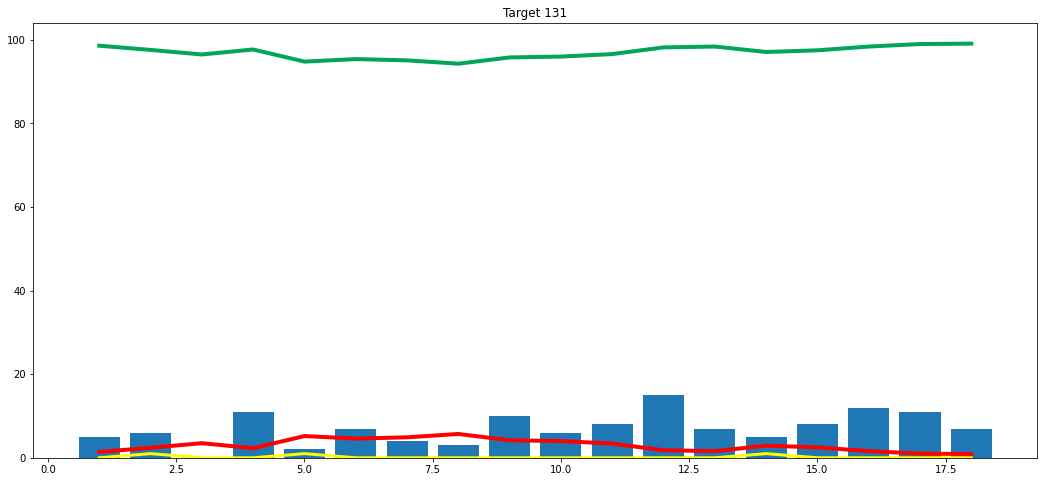

In [206]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_data['over_end'],temp_data['w_i_o'],color='yellow',linewidth=3)
plt.plot(temp_data['over_end'],temp_data['win'],color='#00a65a',linewidth=4)
plt.plot(temp_data['over_end'],temp_data['lose'],color='red',linewidth=4)
plt.bar(temp_data['over_end'],temp_data['r_a_o'])
plt.title('Target '+str(target))



Text(0.5, 1.0, 'Projected Score')

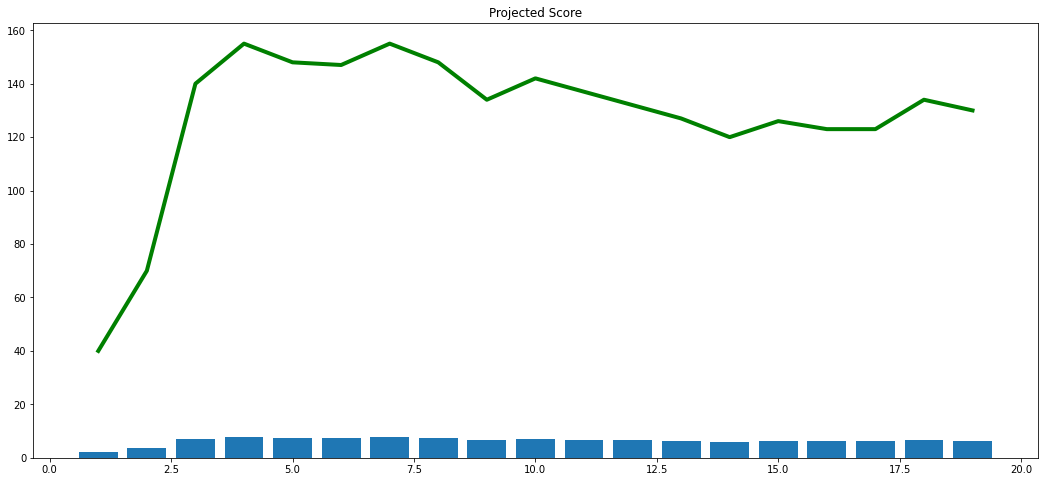

In [207]:
plt.figure(figsize=(18,8))
plt.plot(temp_data1['over_end'],temp_data1['projected_score'],color='green',linewidth=4)
plt.bar(temp_data1['over_end'],temp_data1['c_r'])
plt.title('Projected Score')

In [208]:
teams

['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [209]:
data2['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

In [210]:
import pickle
# pickle.dump(pipe,open('pipe.pkl','wb'))
# pickle.dump(pipe1,open('pipe1.pkl','wb'))